In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score 

/home/recruit/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
class ErrorCalculator():
    def _init_(self, y1_test, y1_predict):
        self.y1_test = y1_test
        self.y1_predict = y1_predict
        
    def get_residuals(self):
        return self.y1_test - self.y1_predict
    
    def get_mse(self):
        return np.square(np.subtract(self.y1_test, self.y1_predict).mean())
    
    def get_standardised_residuals(self):
        return self.get_residuals().std()
    
    def get_rmse(self):
        return np.sqrt(((self.y1_predict - self.y1_test)**2).mean())
    
    def error_summary(self):
        return pd.DataFrame ({'Standardised Residuals Average Min': [self.get_standardised_residuals().min()],
                              'Standardised Residuals Average Mean': [self.get_standardised_residuals().mean()],
                              'Standardised Residuals Average Max': [self.get_standardised_residuals().max()],
                              'MSE': [self.get_mse()],
                              'RMSE': [self.get_rmse()]},
                            
                             columns = ['Standardised Residuals Average Min',
                                        'Standardised Residuals Average Mean',
                                        'Standardised Residuals Average Max',
                                        'MSE',
                                        'RMSE'])
    
    class Plotter():
        def _init_(self, y1_test, y1_pred):
            self.y1_test = y1_test
            self.y1_predict = y1_pred
            
            def run_calculations(self):
                return self.y1_test - self.y1_pred
            
            def plot(self):
                plt.histog(self.y1_test - self.y1_pred)
                plt.title('Residuals plot for predictions')
                plt.xlabel('Residuals')
                plt.ylabel('Frequency')
                return plt.show()
            
            class HistogramPlotter(Plotter):
                def _init_(self, y1_test, y1_pred):
                    Plotter._init_(self, y1_test, y1_pred)
                    
            class ScatterPlotter(Plotter):
                def _init_(self, y1_test, y1_pred):
                    Plotter._init_(self, y1_test, y1_pred)
                    
                def plot(self):
                    chart = pd.DataFrame({'y1_test':self.y1_test,
                                          'y1_prediction':self.y1_pred})
                    chart.plot.scatter(x = 'y1_test', 
                                       y = 'y_prediction',
                                       c = 'DarkBlue')
                    plt.title('Prediction vs Actual values')
                    plt.xlabel('Actual')
                    plt.ylabel('Prediction')
                    return plt.show()
                
                

In [3]:
salary_df = pd.read_csv('salary.csv')
salary_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [4]:
salary_df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [5]:
salary_df.isnull().any()

salary          True
exprior        False
yearsworked    False
yearsrank      False
market         False
degree         False
otherqual      False
position       False
male           False
Field          False
yearsabs       False
dtype: bool

In [6]:
salary_df[salary_df['salary'].isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [7]:
salary_df['yearsrank'].median()

5.0

In [8]:
salary_df_new = salary_df.dropna(axis=0, inplace=True)

In [9]:
salary_df.isnull().values.any()

False

In [10]:
salary = pd.read_csv('Salary metadata.csv', delimiter = ';')
salary

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


# Exploratory Data Analysis

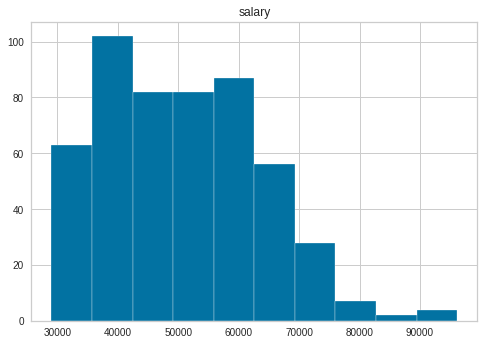

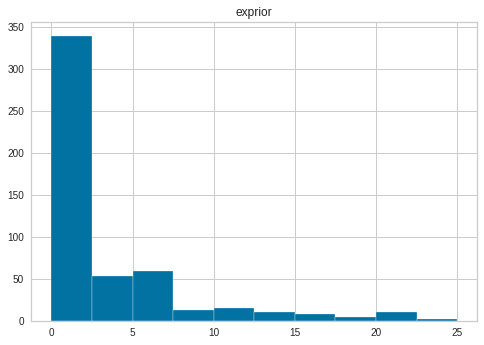

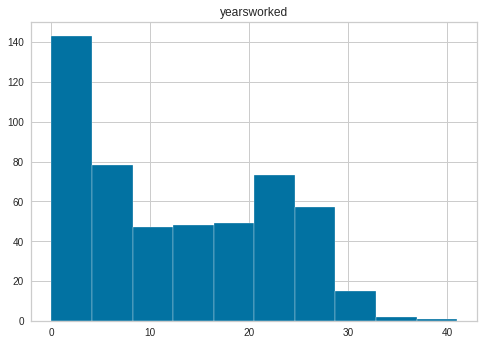

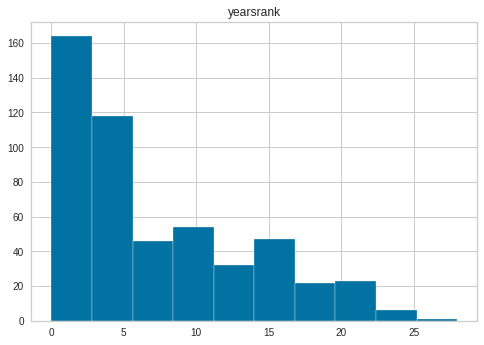

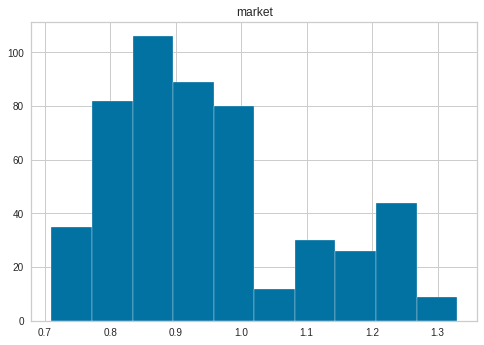

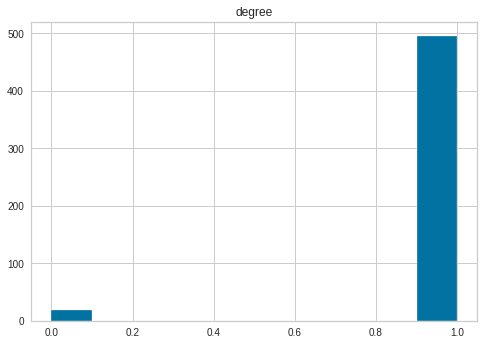

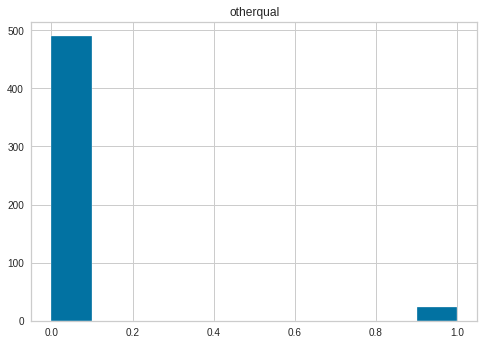

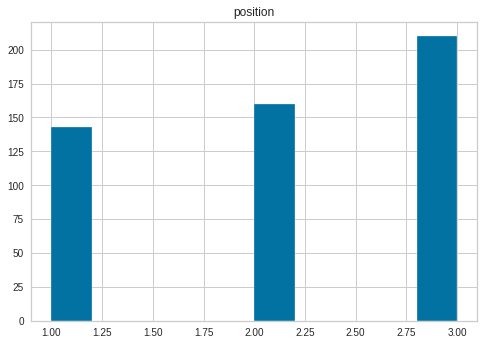

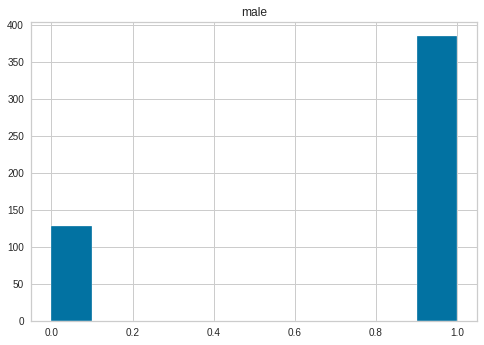

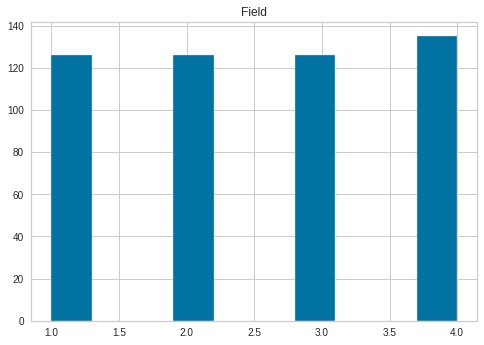

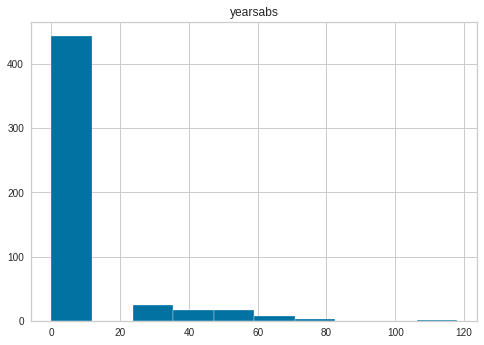

In [11]:
for i in list(salary_df.columns):
    plt.hist(salary_df[i])
    plt.title(i)
    plt.show()



-Most of the people in the sample set have a market value below the median. This also means that most of the people earn a salary below the market value.

-People in the sample set earn low salaries and people in the sample set do not have much experience prior to their current careers.

-Men are the most participants and are in executive positions.

-According to the graphs almost everyone has been absent from work 10 years or less and few people have surpassed that amount of time.


In [12]:
# A correlation matrix is drawn
salary_df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


I can conclude that yearsworked, yearsrank and position are columns I could use to model and that just happened after examining the correlation between all the columns.Therefore, since the position column contains categorical data I cannot use it to build a model.

## Multivariate Linear Regression

In [13]:
dummies_salary_df = pd.get_dummies(salary_df.Field)
dummiess_salary_df = pd.get_dummies(salary_df.position, prefix = 'p')
dummiess_salary_df

,p_1,p_2,p_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
509,0,1,0
510,0,0,1
511,0,0,1
512,0,0,1


In [14]:
dummiess_salary_df.head()

,p_1,p_2,p_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [15]:
multicollinearity_salary_df = pd.concat([salary_df,
                                         dummies_salary_df, dummiess_salary_df], axis=1)
multicollinearity_salary_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,1,2,3,4,p_1,p_2,p_3
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [16]:
multicollinearity_salary_df.isnull().any()

salary         False
exprior        False
yearsworked    False
yearsrank      False
market         False
degree         False
otherqual      False
position       False
male           False
Field          False
yearsabs       False
1              False
2              False
3              False
4              False
p_1            False
p_2            False
p_3            False
dtype: bool

In [17]:
multicollinearity_salary_df.rename(columns={1:'Engineering',2:'Finance',3:'Human Resources',4:'Marketing','p_1':'Junior Employee','p_2':'Manager','p_3':'Executive'}, inplace=True)
multicollinearity_salary_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [18]:
multicollinearity_salary_df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630,0.426059,0.231626,-0.435815,-0.216884,-0.539491,-0.197214,0.677755
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022,0.053511,0.001509,-0.041037,-0.013669,-0.088265,-0.037850,0.116147
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113,0.218146,0.151929,-0.267442,-0.100326,-0.637331,-0.085959,0.662155
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962,0.198489,0.170245,-0.241413,-0.124460,-0.400405,-0.082329,0.442687
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177,0.198321,0.120408,-0.250358,-0.066834,0.035107,-0.044766,0.010162
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447,0.084197,0.034974,-0.063472,-0.054448,-0.023213,-0.031694,0.051028
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792,0.029562,0.095212,-0.079855,-0.043909,-0.113681,-0.064528,0.164458
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521,0.262830,0.141211,-0.306571,-0.095280,-0.858025,-0.107338,0.883543
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058,0.151101,0.025520,-0.162851,-0.013460,-0.244327,-0.088272,0.305962
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778,-0.773769,-0.266817,0.240135,0.782461,0.203696,0.122581,-0.301235


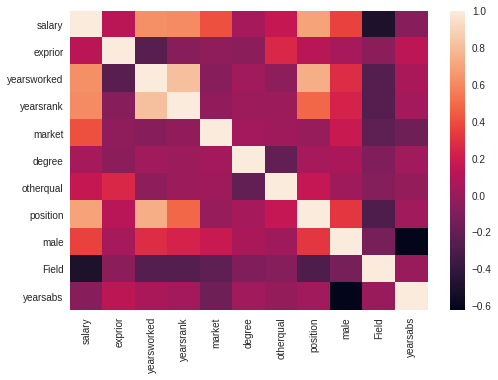

In [19]:
sns.heatmap(salary_df.corr())

position also strongly correlates with Salary and we might have to break it (positions) down further (dummies)
Also hot encoded the position variable adding manager, executive, junior employee onto the salary_df. As position indicated the correlation to our dependent variable salary, I saw that it may be fit to see which position exactly is so highly correlated and if it really has impact to the salary, and why.

In [20]:
m = multicollinearity_salary_df[['yearsworked','yearsrank','Junior Employee','Manager','Executive']] 

In [21]:
n = multicollinearity_salary_df['salary']

Text(0.5, 1.0, 'Salary per Number of Years Worked')

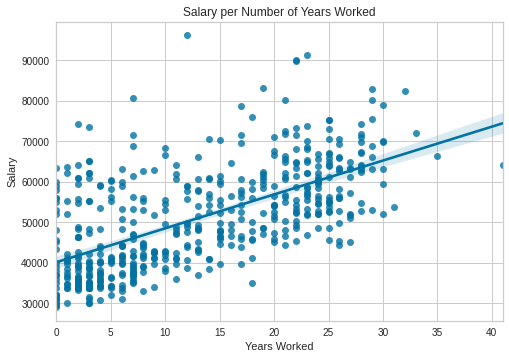

In [22]:
sns.regplot(multicollinearity_salary_df.yearsworked,multicollinearity_salary_df.salary)
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('Salary per Number of Years Worked')

In [23]:
pearsonr(multicollinearity_salary_df.yearsworked,multicollinearity_salary_df.salary)

(0.6235888657598051, 1.287335134291421e-56)

In [24]:
# Produced a correlation matrix comparing the relationship of salary to the rest predictor variavles.

From the above values there is a positive correlation between years worked and salary. This value is statistically significant.

Text(0.5, 1.0, 'salary per number of years worked')

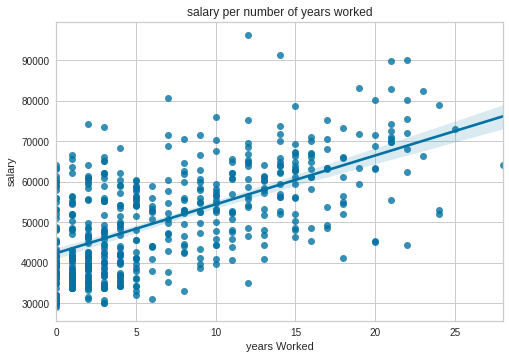

In [25]:
sns.regplot(multicollinearity_salary_df.yearsrank, multicollinearity_salary_df.salary)
plt.xlabel('years Worked')
plt.ylabel('salary')
plt.title('salary per number of years worked')

Therefore, I can use it to model. This can determine that as the number of years increase salary is also likely to increase.

In [26]:
pearsonr(salary_df.yearsrank, salary_df.salary)

(0.6107063176375216, 9.307173080336842e-54)

In [27]:
x1_train, x1_test, y1_train, y1_test = train_test_split(m, n, test_size=0.2, random_state=10)
x1_ctrain = sm.add_constant(x1_train.values)

In [28]:
model1 = sm.OLS(y1_train,x1_ctrain).fit()

In [29]:
x1_ctest = sm.add_constant(x1_test.values)
predictions1 = model1.predict(x1_ctest)

Text(0, 0.5, 'Y - Predicted')

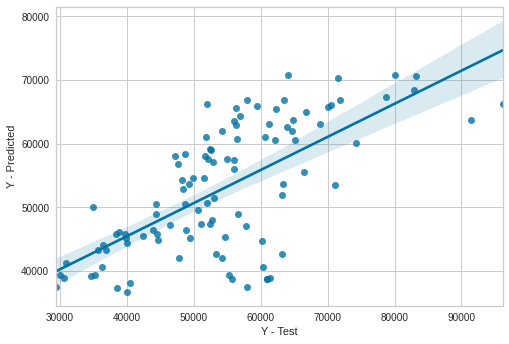

In [30]:
sns.regplot(y1_test,predictions1)
plt.xlabel('Y - Test')
plt.ylabel('Y - Predicted')

This graph looks at the Predicted vs Y-test values to see the relationship between these variables and how much the vary from the model. As you can see there's a moderately strong relationship between the two.

In [31]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.09e-93
Time:                        11:55:13   Log-Likelihood:                -4225.9
No. Observations:                 410   AIC:                             8462.
Df Residuals:                     405   BIC:                             8482.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.538e+04    604.188     58.550      0.000    3.42e+04    3.66e+04
x1          -419.7963     96.191     -4.364      0.000    -608.892    -230.701
x2          1042.3652    106.198      9.815      0.000     833.597    1251.134
x3          2142.1761    667.109      3.211      0.001     830.746    3453.606
x4          9810.7062    560.531     17.503      0.000    8708.794    1.09e+04
x5          2.342e+04    910.787     25.717      0.000    2.16e+04    2.52e+04
==============================================================================
Omnibus:                       60.243   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.069
Skew:                           1.041   Prob(JB):                     9.16e-19
Kurtosis:                       3.728   Cond. No.                     1.38e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.87e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""



The model does significantly predict the dependant variable as the R^2 value is 0.661, which shows moderate accuracy.

66.1% of employees’ salaries is accounted for by our independant variables(yearsworked, yearsrank and positon)


# Model with sklearn

In [32]:
reg = LinearRegression().fit(x1_train, y1_train)

In [33]:
reg_predictions = reg.predict(x1_test)

Text(0, 0.5, 'Y-Predicted')

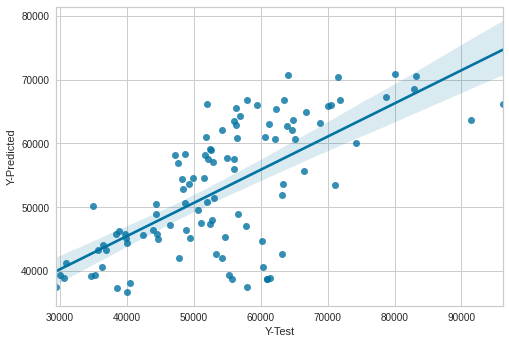

In [34]:
sns.regplot(y1_test, reg_predictions)
plt.xlabel('Y-Test')
plt.ylabel('Y-Predicted')

In [35]:
reg.score(x1_train, y1_train)

0.6608316655882909

In [36]:
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, model1.predict(x1_ctest))))
print('TRAINING RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, model1.predict(x1_ctrain))))

TEST RMSE: 9769.497619601645
TRAINING RMSE: 7244.914056525868


Looking at the RMSE scores there are no signs of overfitting or underfitting.

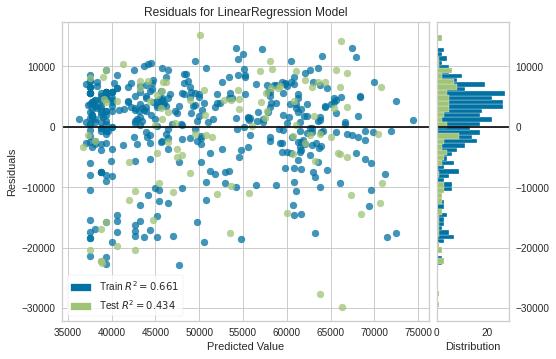

In [37]:
model1 = Ridge()
visualizer = ResidualsPlot(reg)
 
visualizer.fit(x1_train, y1_train)  
visualizer.score(x1_test, y1_test)  
visualizer.show()                  # Finalize and render the figure

In this distplot you see is the most of the values, between 0 and 10 000 this is a sign of model that is able to significantly predict as most of the values are closer to 0.

# Model1


In [38]:
multicollinearity_salary_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [40]:
x = sm.add_constant(x1_train)
model1 = sm.OLS(y1_train, x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.09e-93
Time:                        12:03:11   Log-Likelihood:                -4225.9
No. Observations:                 410   AIC:                             8462.
Df Residuals:                     405   BIC:                             8482.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.538e+04    604.188     58.550      0.000    3.42e+04    3.66e+04
yearsworked      -419.7963     96.191     -4.364      0.000    -608.892    -230.701
yearsrank        1042.3652    106.198      9.815      0.000     833.597    1251.134
Junior Employee  2142.1761    667.109      3.211      0.001     830.746    3453.606
Manager          9810.7062    560.531     17.503      0.000    8708.794    1.09e+04
Executive        2.342e+04    910.787     25.717      0.000    2.16e+04    2.52e+04
==============================================================================
Omnibus:                       60.243   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.069
Skew:                           1.041   Prob(JB):                     9.16e-19
Kurtosis:                       3.728   Cond. No.                     1.38e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.87e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Model2

In [42]:
model2 = multicollinearity_salary_df.copy()
model2.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [43]:
# Removing a column
model2 = model2.drop("yearsrank", axis=1)
model2.head()

,salary,exprior,yearsworked,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [44]:
x = sm.add_constant(x1_train)
model2 = sm.OLS(y1_train, x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.09e-93
Time:                        12:13:05   Log-Likelihood:                -4225.9
No. Observations:                 410   AIC:                             8462.
Df Residuals:                     405   BIC:                             8482.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.538e+04    604.188     58.550      0.000    3.42e+04    3.66e+04
yearsworked      -419.7963     96.191     -4.364      0.000    -608.892    -230.701
yearsrank        1042.3652    106.198      9.815      0.000     833.597    1251.134
Junior Employee  2142.1761    667.109      3.211      0.001     830.746    3453.606
Manager          9810.7062    560.531     17.503      0.000    8708.794    1.09e+04
Executive        2.342e+04    910.787     25.717      0.000    2.16e+04    2.52e+04
==============================================================================
Omnibus:                       60.243   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.069
Skew:                           1.041   Prob(JB):                     9.16e-19
Kurtosis:                       3.728   Cond. No.                     1.38e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.87e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""